In machine learning we often use regularization to contrain or adjust $\theta$. Regularization is used to keep $\theta$ small, which is similiar to keeping them low in complexity.

## Norms

### L1

an $l^1$ is simply the sum of the absolute values $$ \sum_{i=1}^n \lvert x_i \rvert$$ and is notated for vector **x** as $$ \lVert \mathbf{x} \rVert_1 $$

In [1]:
import numpy as np
from numpy.linalg import norm

In [2]:
a = [1, -2, 3]
a

[1, -2, 3]

In [3]:
transform = lambda x: abs(x)
transform(a[1])

2

In [4]:
#manual regularization
sum(transform(xi) for xi in a)

6

In [5]:
#package reg
norm(a, 1)

6.0

### L2

an $l^2$ is the square root of the sum of the squared values $$\sqrt{ \sum_{i=1}^n x_i^2}$$ and is notated for vector **x** as $$ \lVert \mathbf{x} \rVert_2 $$ If no subscript is given, this is the norm that is usually defaulted to.

In [6]:
a

[1, -2, 3]

In [7]:
transform_2 = lambda x: x**2
transform_2(a[1])

4

In [8]:
#manual 
np.sqrt(sum(transform_2(xi) for xi in a))

3.7416573867739413

In [9]:
#package
norm(a,2)

3.7416573867739413

### Max

an $l^\infty$ is the maximum vector value of the absolute values $$max(\rvert \mathbf{x} \lvert)$$ and is notated for vector **x** as $$ \lVert \mathbf{x} \rVert_\infty $$

In [6]:
max(transform(xi) for xi in a)

3

In [7]:
norm(a, np.inf)

3.0

## Ridge Regression

Now that we understand a few of the most popular normalization techniques, we can use these to help constrain linear regression models.

Why constrain?

As we train a model on a dataset, we can build a model to perfectly fit the data, but predict future or untrained data poorly. This is overfitting. One way to avoid this is to contrain the model, that is limit how big any particular $\theta$ can get. 

If $\theta$ is the weight of a particular feature in predicting $y$, then limiting how high it can go will limit how much much weight is given to a model. 

This is done through the cost function. We add a an $l^2$ normalization term to the cost function, and scale it by a scalar $\alpha$.

$$ MSE(\boldsymbol{\theta}) + \alpha \frac{1}{2} (\lVert \boldsymbol{\theta} \rVert_2)^2 $$

In [8]:
import numpy as np

In [33]:
np.random.seed(10)
m=20
X = 2 * np.random.rand(m,1)
y = 4 + 3 * X + np.random.randn(m,1)
X_new = np.linspace(0, 3, 100).reshape(100, 1)

### Linear Model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.predict([[1.5]])

array([[8.77295277]])

### Ridge Regression (Closed Form)

In [36]:
from sklearn.linear_model import Ridge

In [37]:
ridge_reg = Ridge(alpha=1, solver='cholesky') 
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.58942493]])

### Ridge Regression ($\alpha = 0$)

In [38]:
ridge_reg = Ridge(alpha=0, solver='cholesky') # 0 alpha, should be same as the linear model
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[8.77295277]])

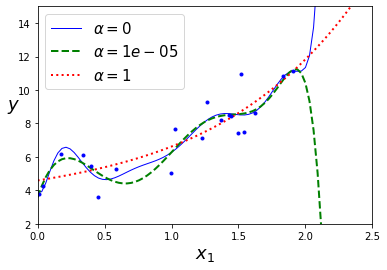

In [49]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures


def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) #if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regu_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2.5, 2, 15])

#plt.figure(figsize=(8,4))
plt.ylabel("$y$", rotation=0, fontsize=18)
#plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

### Ridge Regression (Stochastic Gradient Decent)

In [19]:
from sklearn.linear_model import SGDRegressor

In [58]:
sgd_reg = SGDRegressor(penalty='l2') # Set a penalty to the cost function using the 1/2 the square of the L2 norm
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([8.84340742])

## Lasso Regression

Similar to the Ridge except we use the $l_1$ norm.

$$ MSE(\boldsymbol{\theta}) + \alpha  \lVert \boldsymbol{\theta} \rVert_1 $$

Lasso tends to eliminate (set to 0) little used features. This is because the penalty zones tend to be diamond/rhomboidal in shape, so tandem lines meet at apex rather than the circular penalty zones of the ridge regression.

In [53]:
from sklearn.linear_model import Lasso

In [54]:
lass_reg = Lasso(alpha=0.1)
lass_reg.fit(X,y)
lass_reg.predict([[1.5]])

array([8.64354984])

In [59]:
sgd_reg = SGDRegressor(penalty='l1') # Set a penalty to the cost function the L1 norm
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([8.83781024])

## Elastic Net

Ridge is a good default for linear regression (as some type of regularization is preferred). However, if you believe some of the features should be eliminated, lasso or elastic net are good options. Elastic net works better when training features are > instances.

Elastic net is a combo of Ridge and Lasso, with $r$ controlling the mix of each.

In [60]:
from sklearn.linear_model import ElasticNet

In [62]:
elast_net = ElasticNet(alpha=0.1, l1_ratio=0.5) # half and half
elast_net.fit(X,y)
elast_net.predict([[1.5]])

array([8.53261151])